In [1]:
from tensorflow.keras.models import load_model

# Load the saved U-Net model
model_augmented = load_model(r"D:\download\unet_model.h5")


In [9]:
import cv2
import numpy as np

# Load an image (Change 'test_image.jpg' to your actual image path)
image_path = "f2.jpg"
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image = cv2.resize(image, (128,128))  # Resize to match model input size
image = image / 255.0  # Normalize pixel values
image = np.expand_dims(image, axis=0)  # Add batch dimension


In [17]:
predicted_mask = model_augmented.predict(image)
predicted_mask = (predicted_mask > 0.9).astype(np.uint8)  # Convert to binary mask


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


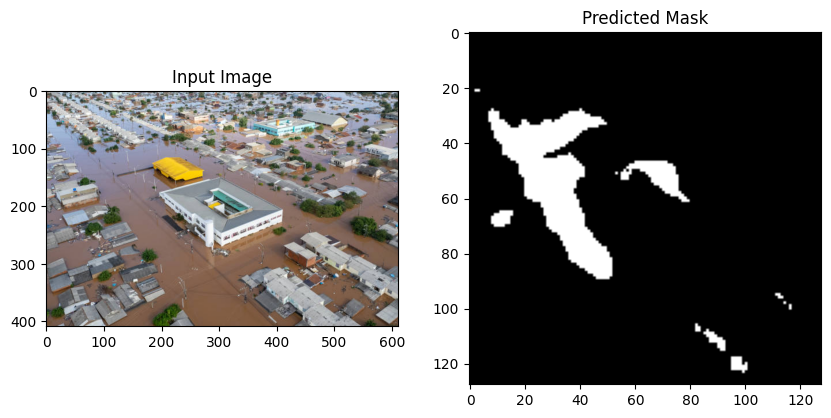

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.imread(image_path)[..., ::-1])  # Convert BGR to RGB
plt.title("Input Image")

plt.subplot(1, 2, 2)
plt.imshow(predicted_mask[0, :, :, 0], cmap="gray")
plt.title("Predicted Mask")

plt.show()


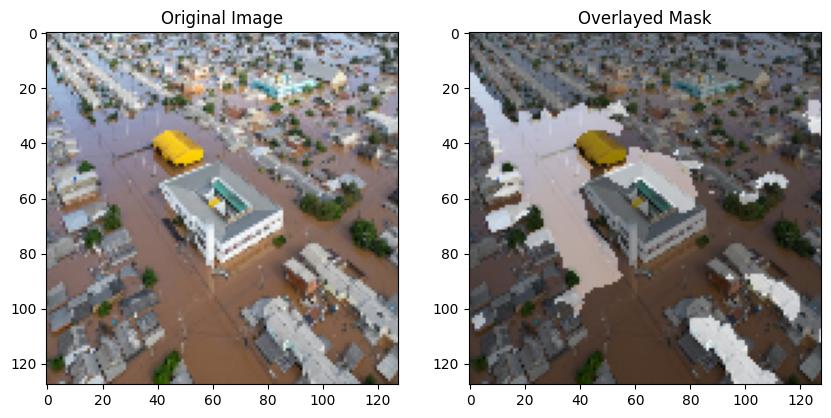

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
original_image = cv2.imread(image_path)
original_image = cv2.resize(original_image, (128, 128))  # Resize to match model input

# Convert predicted mask to 3 channels for overlay
predicted_mask_colored = np.repeat(predicted_mask[0, :, :, 0][:, :, np.newaxis], 3, axis=2) * 255

# Overlay mask with transparency
overlay = cv2.addWeighted(original_image, 0.6, predicted_mask_colored.astype(np.uint8), 0.4, 0)

# Plot the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.title("Overlayed Mask")

plt.show()


In [14]:
import cv2

# Convert mask to uint8 format
binary_mask = (predicted_mask[0, :, :, 0] * 255).astype(np.uint8)

# Apply morphological operations
kernel = np.ones((3, 3), np.uint8)
binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)  # Remove small holes
binary_mask = cv2.medianBlur(binary_mask, 5)  # Smoothen edges

# Convert back to original shape
binary_mask = np.expand_dims(binary_mask, axis=-1)
binary_mask = np.repeat(binary_mask, 3, axis=2)  # Convert to 3 channels


In [20]:
print(np.unique(predicted_mask))


[0 1]


In [2]:
def preprocess_image(image_path, target_size=(128, 128)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = cv2.resize(image, target_size)  # Resize to model input size
    image = image / 255.0  # Normalize
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

image_path = "f4.jpg"  # Replace with the actual image path
image = preprocess_image(image_path)

# ✅ Predict segmentation mask
predicted_mask = model_augmented.predict(image)[0]  # Remove batch dimension

# ✅ Apply threshold to get binary mask
threshold = 0.3  # Adjust as needed
binary_mask = (predicted_mask > threshold).astype(np.uint8)  # (128, 128, 1)

# ✅ Convert to 3-channel for visualization
mask_colored = np.stack([binary_mask.squeeze()] * 3, axis=-1) * 255  # Shape (128, 128, 3)

# ✅ Load the original image for overlay
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
original_image = cv2.resize(original_image, (128, 128))

# ✅ Blend the mask with the original image
overlay = cv2.addWeighted(original_image, 0.7, mask_colored.astype(np.uint8), 0.3, 0)

# ✅ Display results
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

# Predicted Mask
plt.subplot(1, 3, 2)
plt.imshow(binary_mask.squeeze(), cmap="gray")
plt.title("Predicted Mask")
plt.axis("off")

# Overlayed Mask
plt.subplot(1, 3, 3)
plt.imshow(overlay)
plt.title("Overlayed Mask")
plt.axis("off")

plt.show()

NameError: name 'cv2' is not defined

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


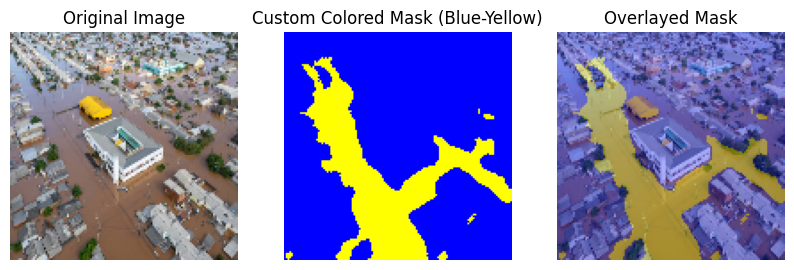

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def preprocess_image(image_path, target_size=(128, 128)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = cv2.resize(image, target_size)  # Resize to model input size
    image = image / 255.0  # Normalize
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

image_path = "f2.jpg"  # Replace with the actual image path
image = preprocess_image(image_path)

# Predict segmentation mask
predicted_mask = model_augmented.predict(image)[0]  # Remove batch dimension

# Apply threshold to get binary mask
threshold = 0.3  # Adjust as needed
binary_mask = (predicted_mask > threshold).astype(np.uint8)  # (128, 128, 1)

# Convert to 3-channel and assign custom colors
mask_colored = np.zeros((128, 128, 3), dtype=np.uint8)

# Set 0 (background) to blue (R=0, G=0, B=255)
mask_colored[binary_mask.squeeze() == 0] = [0, 0, 255]

# Set 1 (foreground) to yellow (R=255, G=255, B=0)
mask_colored[binary_mask.squeeze() == 1] = [255, 255, 0]

#  Load the original image for overlay
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
original_image = cv2.resize(original_image, (128, 128))

# Blend the mask with the original image
overlay = cv2.addWeighted(original_image, 0.7, mask_colored, 0.3, 0)

# Display results
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

# Custom Colored Mask
plt.subplot(1, 3, 2)
plt.imshow(mask_colored)
plt.title("Custom Colored Mask (Blue-Yellow)")
plt.axis("off")

# Overlayed Mask
plt.subplot(1, 3, 3)
plt.imshow(overlay)
plt.title("Overlayed Mask")
plt.axis("off")

plt.show()
